In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



,0
0,35.467
1,63.951
2,80.940
3,60.665
4,127.061
5,64.511
6,318.523


In [4]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
  # Assuming a single CSV file is uploaded, use the first filename
  # You can modify this if you expect multiple files or specific naming
  uploaded_filename = filename

Saving monthly_milk_production.csv to monthly_milk_production.csv
Uploaded file "monthly_milk_production.csv" with length 2371 bytes


In [17]:
import pandas as pd

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(uploaded_filename)

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Set the frequency of the index
df.index.freq = 'MS'

# Display the first 5 rows of the DataFrame
display(df.head())

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: >

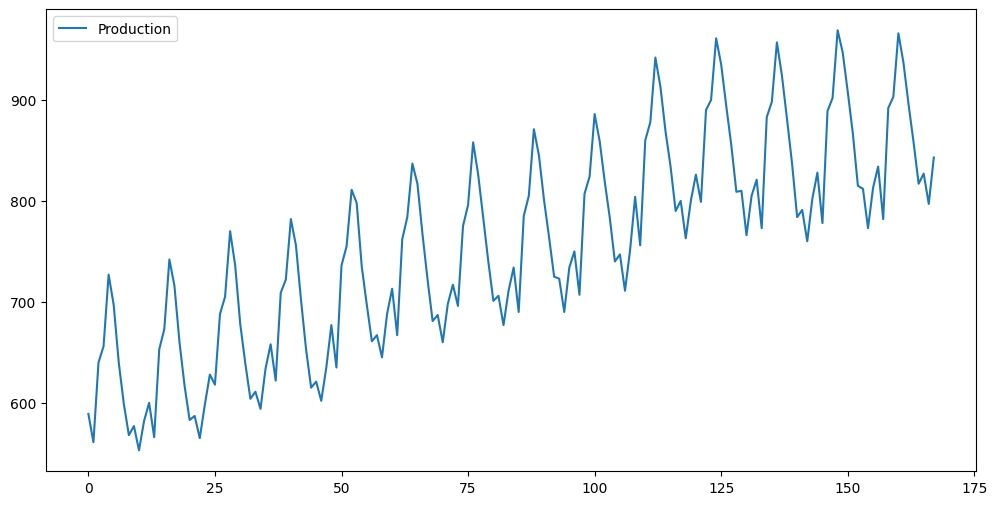

In [7]:
df.plot(figsize=(12,6))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

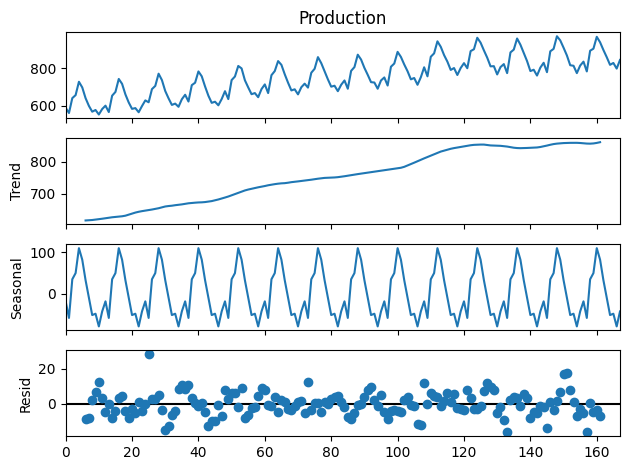

In [10]:
results=seasonal_decompose(df['Production'], period=12)
results.plot();

In [11]:
len(df)

168

In [18]:
len(df)
train = df.iloc[:156]
test = df.iloc[156:]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [15]:
df.head(),df.tail()

(      Date  Production
 0  1962-01         589
 1  1962-02         561
 2  1962-03         640
 3  1962-04         656
 4  1962-05         727,
         Date  Production
 163  1975-08         858
 164  1975-09         817
 165  1975-10         827
 166  1975-11         797
 167  1975-12         843)

In [23]:
scaler.fit(train[['Production']])
scaled_train=scaler.transform(train[['Production']])
scaled_test=scaler.transform(test[['Production']])

In [24]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [30]:
X,y=generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [31]:
X.shape

(1, 3, 1)

In [32]:
n_input=12
generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [36]:
#define model
model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Model fit
model.fit(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0764
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0208
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0204
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0041
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0

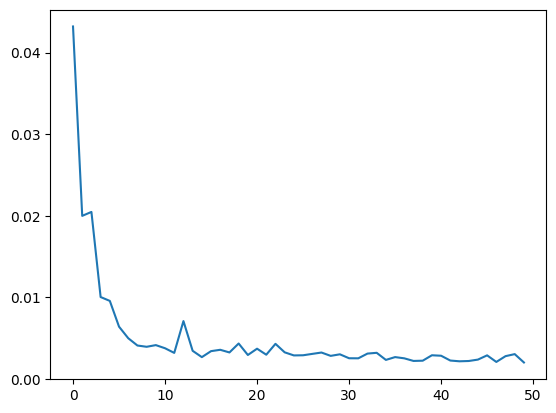

In [40]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [41]:
last_train_batch=scaled_train[-12:]

In [42]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [44]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


array([[0.6527058]], dtype=float32)

In [45]:
scaled_test[0]

array([0.67548077])

In [46]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [47]:
test_predictions

[array([0.6527058], dtype=float32),
 array([0.63750756], dtype=float32),
 array([0.8148262], dtype=float32),
 array([0.8879817], dtype=float32),
 array([0.98692626], dtype=float32),
 array([0.96810156], dtype=float32),
 array([0.8969026], dtype=float32),
 array([0.7980107], dtype=float32),
 array([0.6870352], dtype=float32),
 array([0.6456099], dtype=float32),
 array([0.59829754], dtype=float32),
 array([0.6338264], dtype=float32)]

In [48]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [49]:
true_predictions=scaler.inverse_transform(test_predictions)

In [50]:
test['Predictions']=true_predictions

/tmp/ipython-input-2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


<Axes: xlabel='Date'>

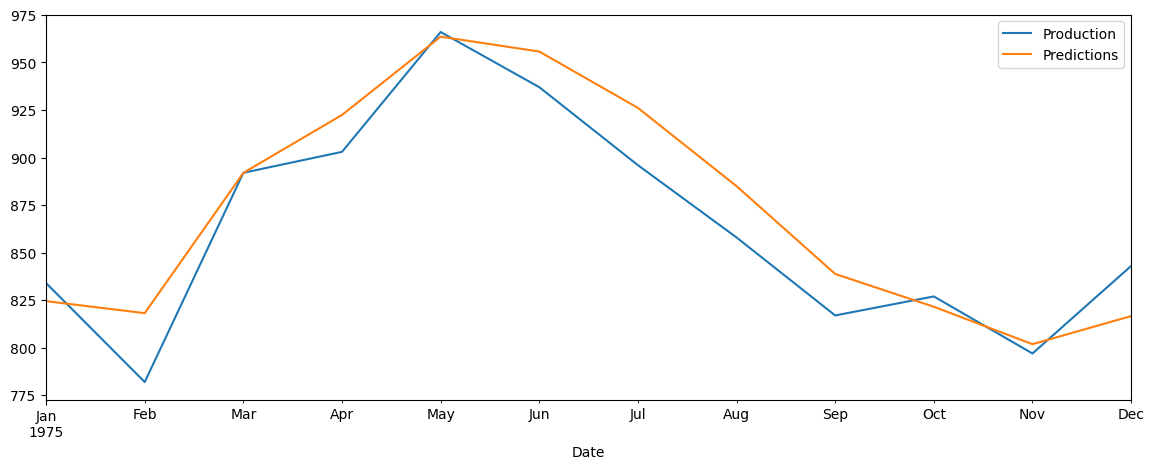

In [52]:
test.plot(figsize=(14,5))

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

20.39172991428193
